# IMPORT SECTION

In [3]:
# IMPORT SECTION
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set_context("notebook")

# ACQUIRE DATA

In [3]:
# ACQUIRE DATA
# esb (business indicator)
print("{} ESB {}".format('='*5, '='*5))
filename = "./training_data/2020_05_04/esb.csv"
print("opening {}".format(filename))
esb_df = pd.read_csv(filename, header=0)
esb_df = esb_df.rename(columns={
    'serviceName': 'service_name', 
    'startTime': 'start_time'})
print(esb_df.info())
esb_df.describe()

===== ESB =====
opening ./training_data/2020_05_04/esb.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   serviceName  1439 non-null   object 
 1   startTime    1439 non-null   int64  
 2   avg_time     1439 non-null   float64
 3   num          1439 non-null   int64  
 4   succee_num   1439 non-null   int64  
 5   succee_rate  1439 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 67.6+ KB
None


,startTime,avg_time,num,succee_num,succee_rate
count,1.439000e+03,1439.000000,1439.000000,1439.000000,1439.0
mean,1.588565e+12,0.606253,507.325226,507.325226,1.0
std,2.494387e+07,0.042155,72.569547,72.569547,0.0
min,1.588522e+12,0.490900,303.000000,303.000000,1.0
25%,1.588543e+12,0.580900,449.000000,449.000000,1.0
50%,1.588565e+12,0.604100,510.000000,510.000000,1.0
75%,1.588586e+12,0.631300,565.000000,565.000000,1.0
max,1.588608e+12,0.923700,704.000000,704.000000,1.0


In [4]:
# ACQUIRE DATA
# host KPI
print("{} host {}".format('='*5, '='*5))
host_df_lst = []
for s_name in ["db_oracle_11g", "dcos_container", "dcos_docker", "mw_redis", "os_linux"]:
    filename = "./training_data/2020_05_04/host/" + s_name + ".csv"
    print("opening {}".format(filename))
    temp_df = pd.read_csv(filename, header=0)
    temp_df = temp_df.rename(columns={'itemid': 'item_id'}) # rename columns so that is follows convention some_special_name
    host_df_lst.append(temp_df)

host_df = pd.concat(host_df_lst) 
print(host_df.info())
host_df.describe()

# NOTE: different itemid describes different KPIs (key performance index)

===== host =====
opening ./training_data/2020_05_04/host/db_oracle_11g.csv
opening ./training_data/2020_05_04/host/dcos_container.csv
opening ./training_data/2020_05_04/host/dcos_docker.csv
opening ./training_data/2020_05_04/host/mw_redis.csv
opening ./training_data/2020_05_04/host/os_linux.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2387373 entries, 0 to 1214607
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   itemid     int64  
 1   name       object 
 2   bomc_id    object 
 3   timestamp  int64  
 4   value      float64
 5   cmdb_id    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 127.5+ MB
None


,itemid,timestamp,value
count,2.387373e+06,2.387373e+06,2.387373e+06
mean,7.874626e+14,1.588565e+12,7.031046e+07
std,4.091030e+14,2.493578e+07,6.485663e+08
min,4.871784e+07,1.588522e+12,0.000000e+00
25%,1.000000e+15,1.588543e+12,0.000000e+00
50%,1.000000e+15,1.588565e+12,6.000000e-01
75%,1.000000e+15,1.588586e+12,2.782297e+01
max,1.000000e+15,1.588608e+12,9.433807e+09


In [4]:
# ACQUIRE DATA
# trace
print("{} trace {}".format('='*5, '='*5))
trace_df_lst = []
for c_type in ["csf", "fly_remote", "jdbc", "local", "osb", "remote_process"]:
    filename = "./training_data/2020_05_04/trace/trace_" + c_type + ".csv"
    print("opening {}".format(filename))
    temp_df = pd.read_csv(filename, header=0)
    temp_df = temp_df.rename(columns={
    'callType': 'call_type', 
    'startTime': 'start_time', 
    'elapsedTime': 'elapsed_time', 
    'traceId':'trace_id', 
    'serviceName': 'service_name', 
    'dsName': 'ds_name'}) # rename columns so that is follows convention some_special_name except for Id
    trace_df_lst.append(temp_df)

trace_df = pd.concat(trace_df_lst)
print(trace_df.info())

# NOTE: warning, trace_df is 3.2+ GB large !

===== trace =====
opening ./training_data/2020_05_04/trace/trace_csf.csv
opening ./training_data/2020_05_04/trace/trace_fly_remote.csv
opening ./training_data/2020_05_04/trace/trace_jdbc.csv
opening ./training_data/2020_05_04/trace/trace_local.csv
opening ./training_data/2020_05_04/trace/trace_osb.csv
opening ./training_data/2020_05_04/trace/trace_remote_process.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42353226 entries, 0 to 3650204
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   callType     object 
 1   startTime    int64  
 2   elapsedTime  float64
 3   success      bool   
 4   traceId      object 
 5   id           object 
 6   pid          object 
 7   cmdb_id      object 
 8   serviceName  object 
 9   dsName       object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 3.2+ GB
None


# VISUALIZE DATA

## esb

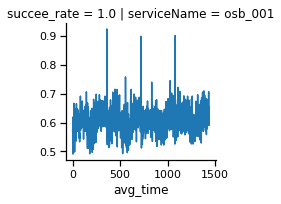

In [5]:
# VISUALIZE DATA
## esb
esb = sns.FacetGrid(esb_df, col='service_name', row='succee_rate', palette='pastel')
esb = esb.map(plt.plot, 'avg_time')

## host kpi
### treatment
- What sort of data is contained in the host_df dataframe ?
- We have 6 columns (itemid name bomc_id timestamp value cmdb_id) and we would like to see what's inside.
- First, let's go simple and get a look at the .describe() which will tell us the count, unique values and ather interesting features

### observations
- 'name' seems consistent with 'bomc_id' (130 unique values)

In [6]:
# VISUALIZE DATA
## host kpi
print("{}name{}".format('-'*3, '-'*3))
print(host_df['name'].describe())
print("{}item_id{}".format('-'*3, '-'*3))
print(host_df['item_id'].astype(str).describe()) # itemid, because it's an id, must be considered as string (for counts, unique...)
print("{}bomc_id{}".format('-'*3, '-'*3))
print(host_df['bomc_id'].describe())
print("{}cmdb_id{}".format('-'*3, '-'*3))
print(host_df['cmdb_id'].describe())

---name---
count          2387373
unique             130
top       Disk_io_util
freq             89353
Name: name, dtype: object
---itemid---
count             2387373
unique               2508
top       999999996508263
freq                 1440
Name: itemid, dtype: object
---bomc_id---
count        2378013
unique           130
top       ZJ-001-069
freq           69119
Name: bomc_id, dtype: object
---cmdb_id---
count     2387373
unique         57
top        os_017
freq        58767
Name: cmdb_id, dtype: object


## host KPI (cont'd)
### treatment
- Second, let's try to visualize the previous data using plots (which would be much more clear, convenient and understandable)

### observations

- KPIs index describes how well the hoes is going. 
- After noticing an anomaly in, say, esb_df['avg_time'], we can look up in these KPIs value to see which component fails, what is the source of the problem => for troubleshooting
- OR we can double check on both sides (avg_time AND these KPIs values) to detect directly the failing component rather than detect an anomaly and then look up for it.
- The trace_df should help us find the failing component from the anomaly (tracing back to the source of the problem)

In [ ]:
## (host KPI cont'd)
data=host_df.iloc[:100] # only take the first 100 values to visualize (it's too big)

fig, axes = plt.subplots(2, 1, figsize=(10, 5))
fig.suptitle("Value v/s timestamp", fontweight='bold')
host1 = sns.lineplot(ax = axes[0], data=data, x='timestamp', y='value')
axes[0].set_title("no hue")
axes[0].set_ylim(0, data['value'].mean()) # un-flatten the curve (haha)

host2 = sns.lineplot(ax = axes[1], data=data, x='timestamp', y='value', hue='name', legend=False)
axes[1].set_title("hue = 'name'")
axes[1].set_ylim(0, data['value'].mean()) 

fig.tight_layout()

# host = sns.FacetGrid(host_df.sort_values(by='timestamp').iloc[:100], col='name', col_wrap=5)
# host = host.map(plt.plot, 'value', 'timestamp')

## trace 
- what are the services involed in the same trace frequently ?
- what spans frequently call each other ?

In [8]:
# VISUALIZE DATA
## trace
data = trace_df.iloc[:100]

# average elapsed time of each trace_id to execute
# data[['traceId', 'elapsedTime']].groupby(['traceId'], as_index=False).mean()


,traceId,elapsedTime
0,14b18171db4409d14596,57.60
1,1bb42171db4405934720,359.40
2,1bbd3171db44052d3700,331.00
3,1c094171db4404154872,299.60
4,1da4c171db4404134276,297.20
5,2b095171db4404593730,105.00
6,2bbb0171db4407f54562,121.80
7,487b8171db4404183694,96.80
8,4e785171db4408a24814,73.00
9,82c4b171db4408a44818,73.00


In [ ]:
# TEST: moving average on esb_df['avg_time]
#       we consider the time series approach: different moving average smoothing to detect anomalies.
#       see lesson 5 - time series

# Below are 2 figures for esb_df['avg_time'] where the first one plots a simple moving average 
#       applied to the data, and the second plots a simple exponential moving average
window_sizes = [2, 5, 10, 20, 50]
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Different moving average smoothing for esb", fontsize=16, fontweight='bold')

# visualization aesthetics
current_palette = sns.color_palette('pastel', n_colors=len(window_sizes))
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
colors = plt.cm.jet(np.linspace(0, 1, len(window_sizes)+1))

# moving average (simple)
axes[0].plot(esb_df['avg_time'], color=colors[0], label="esb", alpha=.2)
for i in range(len(window_sizes)):
    axes[0].plot(esb_df['avg_time'].rolling(window=window_sizes[i]).mean(), color=colors[i+1], label="win_size={}".format(window_sizes[i]))
axes[0].set_xlabel("sample no")
axes[0].set_ylabel("business indicator (esb)")
axes[0].set_title("Simple moving average", fontweight='bold')
axes[0].legend(loc='best')

# simple exponential moving average
axes[1].plot(esb_df['avg_time'], color=colors[0], label="esb", alpha=.2)
for i in range(len(window_sizes)):
    axes[1].plot(esb_df['avg_time'].ewm(span=window_sizes[i]).mean(), color=colors[i+1], label="win_size={}".format(window_sizes[i]))
axes[1].set_xlabel("sample no")
axes[1].set_ylabel("business indicator (esb)")
axes[1].set_title("Exponential moving average - no fitting", fontweight='bold')
axes[1].legend(loc='best')

fig.tight_layout()

In [ ]:
# see https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/
# NOTE: work in progress...
#       still needs some understanding of exponential smoothing and how to use the library
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = SimpleExpSmoothing(esb_df['avg_time'])
model_fit = model.fit()
yhat = model_fit.predict()


fig, axes = plt.subplots(2, 1, figsize=(10, 15))
axes[0].plot(model_fit)

fig.tight_layout()
print(model_fit)
